In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [ ]:
# Load the dataset
file_path = '/content/RTA Dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(df.head())

# Display column names to understand the available features
print(df.columns)

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import pandas as pd

# Preprocess time data for time-of-day analysis
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

<ipython-input-3-8f8911c5a458>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


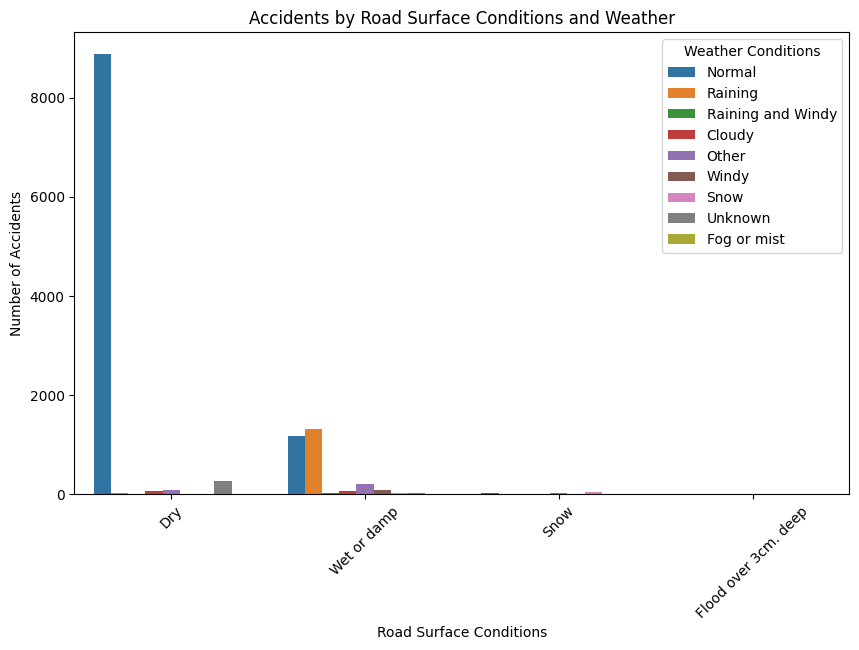

In [ ]:
#  Analyzing accidents based on road conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Road_surface_conditions', hue='Weather_conditions')
plt.title('Accidents by Road Surface Conditions and Weather')
plt.xticks(rotation=45)
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather Conditions')
plt.show()

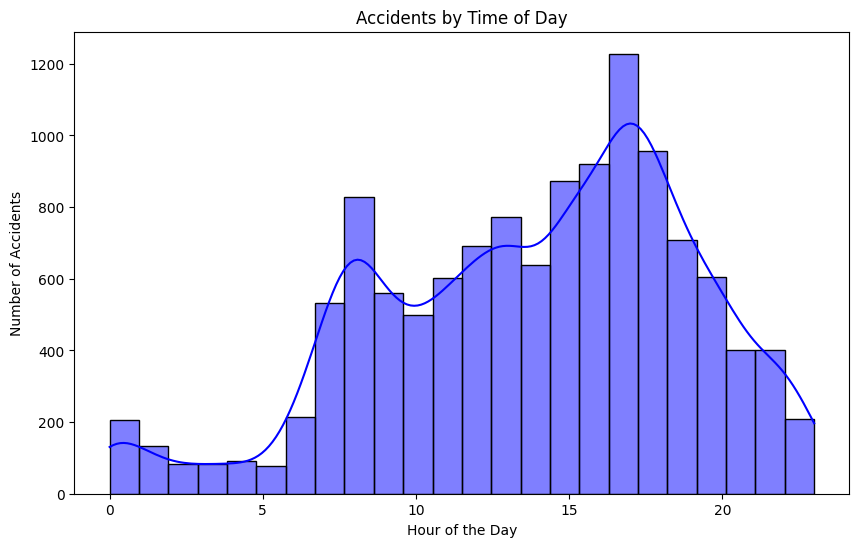

In [ ]:
#  Analyzing accidents based on time of day
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Hour', bins=24, kde=True, color='blue')
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

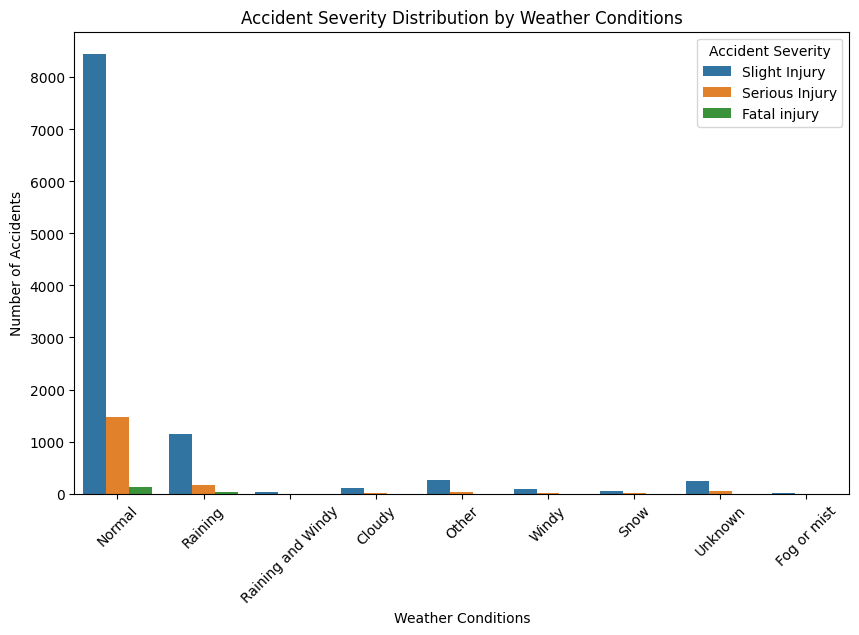

In [ ]:
#  Accident severity based on weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather_conditions', hue='Accident_severity')
plt.title('Accident Severity Distribution by Weather Conditions')
plt.xticks(rotation=45)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.show()

<ipython-input-8-ccdc065c2f7d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=area_counts.head(10), x='Number_of_Accidents', y='Area_accident_occured', palette='viridis')


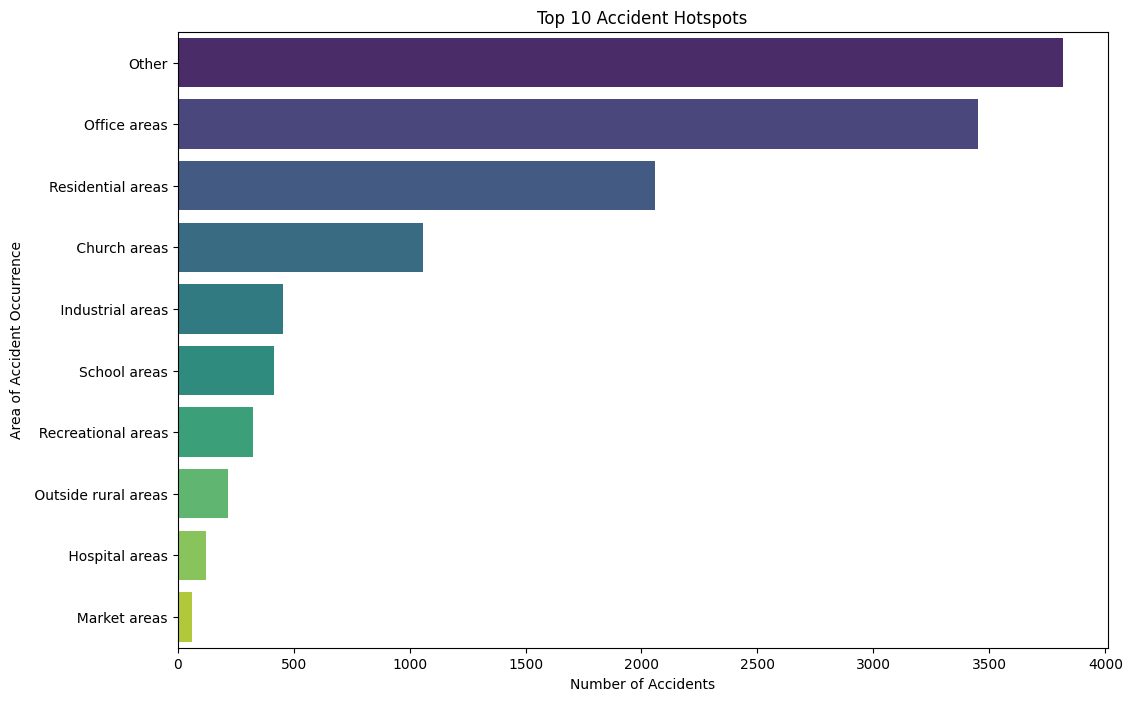

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count accidents by the area where they occurred
area_counts = df['Area_accident_occured'].value_counts().reset_index()
area_counts.columns = ['Area_accident_occured', 'Number_of_Accidents']

# Plot the top 10 areas with the most accidents
plt.figure(figsize=(12, 8))
sns.barplot(data=area_counts.head(10), x='Number_of_Accidents', y='Area_accident_occured', palette='viridis')
plt.title('Top 10 Accident Hotspots')
plt.xlabel('Number of Accidents')
plt.ylabel('Area of Accident Occurrence')
plt.show()


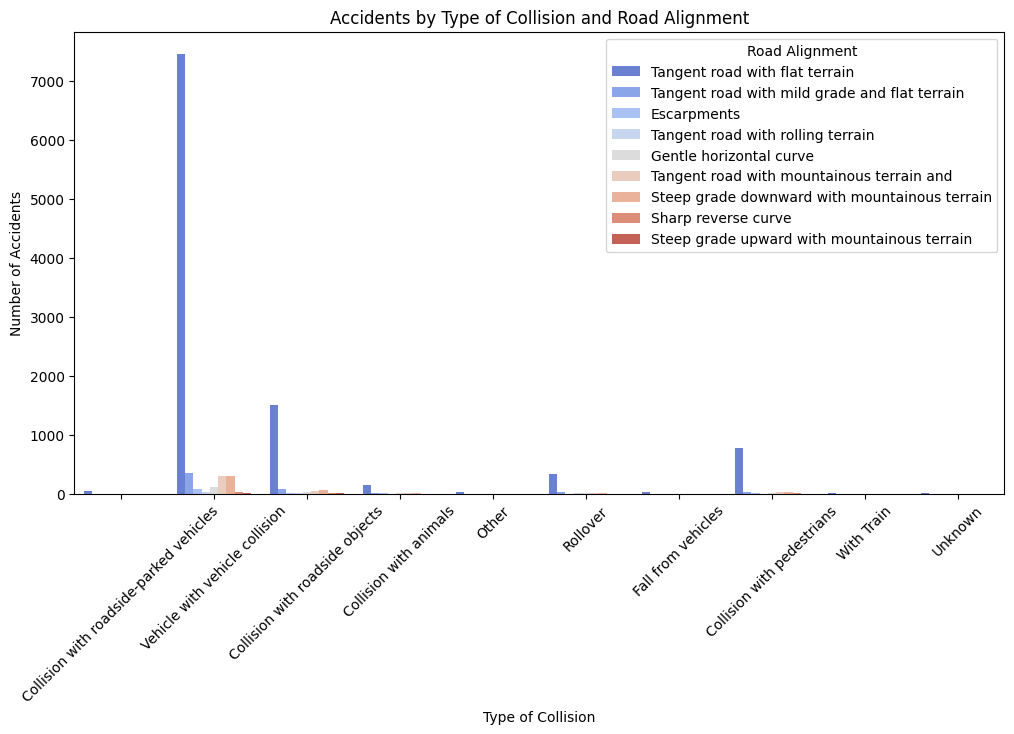

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of accidents based on the type of collision and road alignment
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Type_of_collision', hue='Road_allignment', palette='coolwarm')
plt.title('Accidents by Type of Collision and Road Alignment')
plt.xlabel('Type of Collision')
plt.ylabel('Number of Accidents')
plt.legend(title='Road Alignment')
plt.xticks(rotation=45)
plt.show()


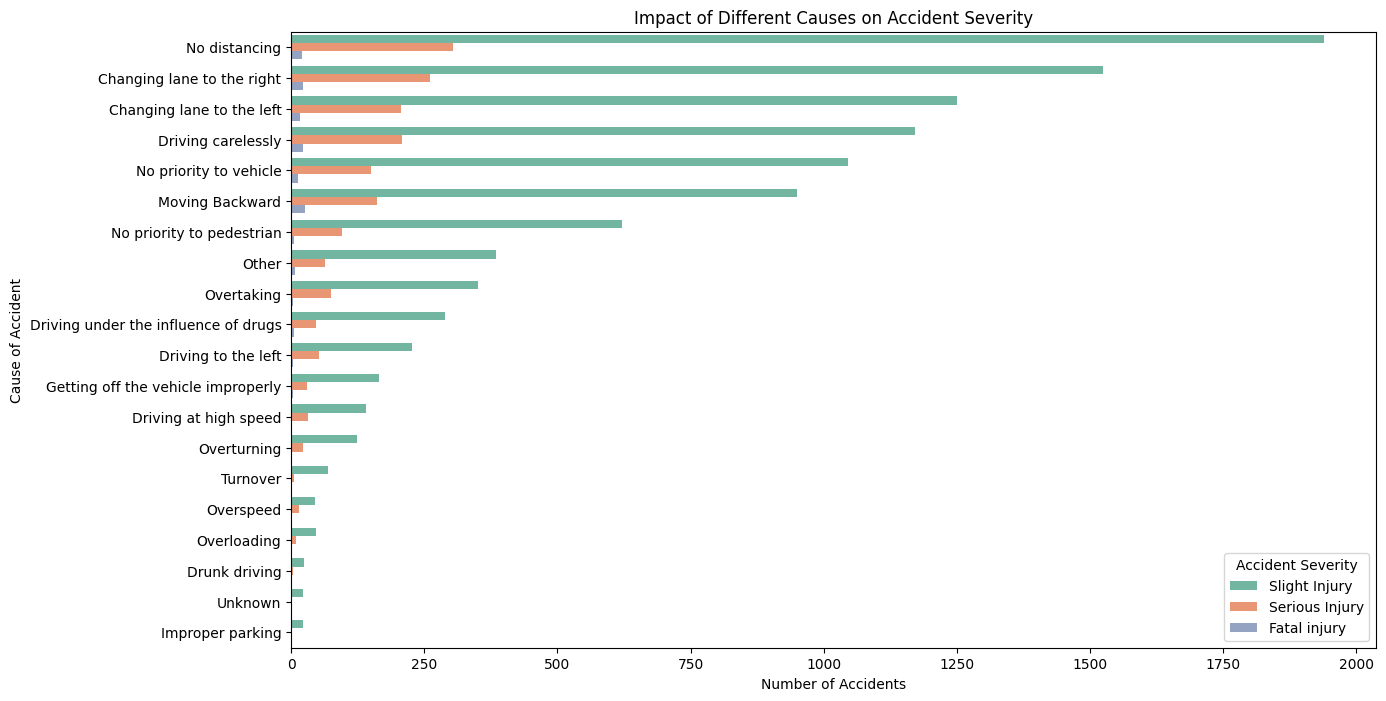

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the number of accidents for each cause, grouped by severity
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='Cause_of_accident', hue='Accident_severity', palette='Set2', order=df['Cause_of_accident'].value_counts().index)
plt.title('Impact of Different Causes on Accident Severity')
plt.xlabel('Number of Accidents')
plt.ylabel('Cause of Accident')
plt.legend(title='Accident Severity')
plt.show()


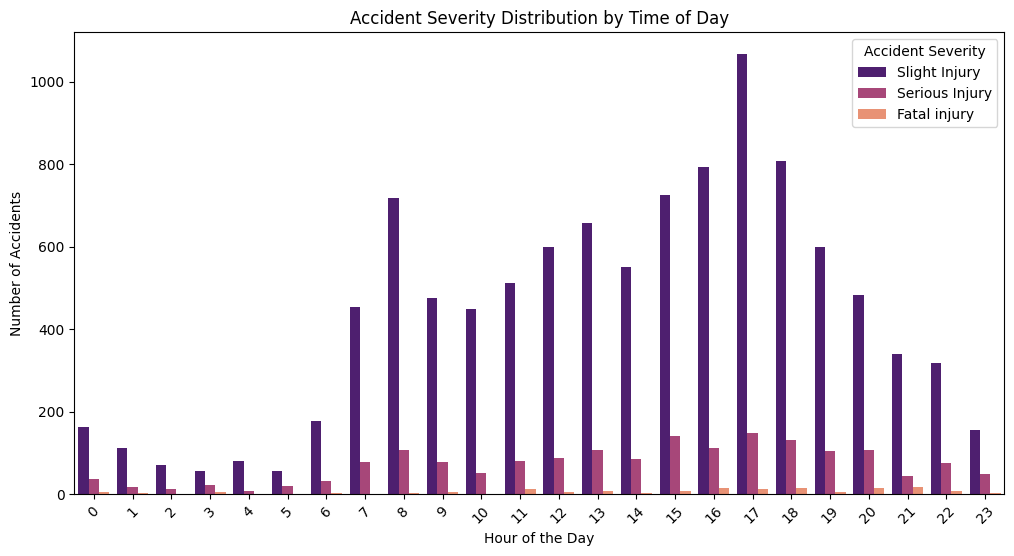

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a plot to show accident severity by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hour', hue='Accident_severity', palette='magma')
plt.title('Accident Severity Distribution by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.xticks(range(0, 24), rotation=45)
plt.show()


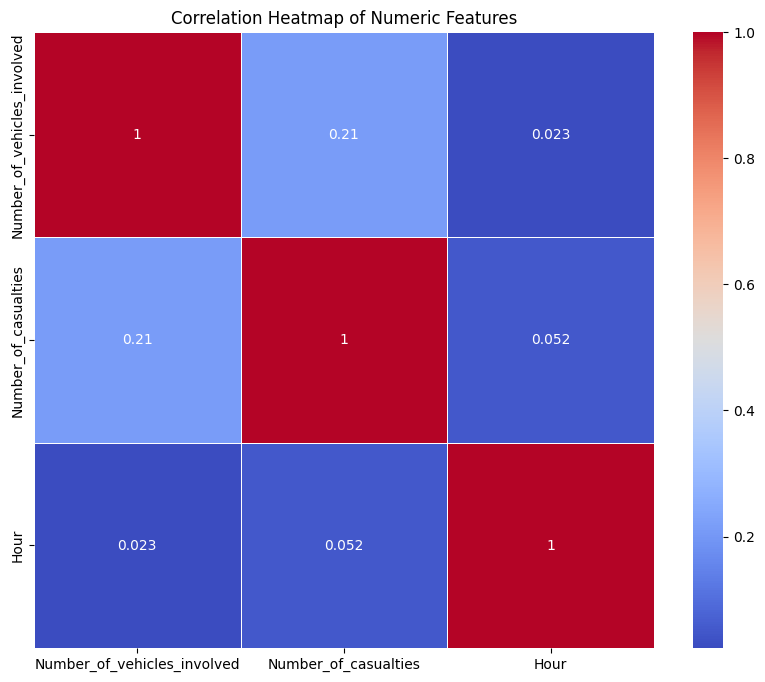

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()
